# Cargar librerías necesarias

In [2]:

import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import os


## Cargar los datos

In [3]:

# Ruta del archivo CSV (ajusta según la ubicación en tu equipo)
dataset_path = r"C:\Users\mavel\Downloads\GitHub\proyecto_reto_insulina_INRAE\data\100_Batches_IndPenSim_V3.csv"


# Verificar si el archivo existe
if os.path.exists(dataset_path):
    dataset = pd.read_csv(dataset_path)
    print(" Dataset cargado correctamente.")
else:
    print(f" Archivo no encontrado en la ruta: {dataset_path}")

# Mostrar las primeras filas del dataset
dataset.head()


 Dataset cargado correctamente.


,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


## Análisis exploratorio

In [4]:
# Información general
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Columns: 2239 entries, Time (h) to 201
dtypes: float64(2225), int64(14)
memory usage: 1.9 GB


In [5]:
# Estadística descriptiva
dataset.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,0.0,0.0
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,1.414688e+06,1.422458e+06,1.429568e+06,1.435311e+06,1.439196e+06,1.441100e+06,1.441329e+06,1.440539e+06,NaN,NaN
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,6.561401e+05,6.569029e+05,6.576540e+05,6.583792e+05,6.590689e+05,6.597212e+05,6.603415e+05,6.609441e+05,NaN,NaN
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,8.384900e+05,8.457550e+05,8.523800e+05,8.575200e+05,8.608000e+05,8.620850e+05,8.617850e+05,8.604450e+05,NaN,NaN
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,1.421700e+06,1.429600e+06,1.436700e+06,1.442500e+06,1.446400e+06,1.448400e+06,1.448600e+06,1.447800e+06,NaN,NaN
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,1.964700e+06,1.973100e+06,1.980800e+06,1.987100e+06,1.991500e+06,1.994100e+06,1.994900e+06,1.994600e+06,NaN,NaN
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,2.902800e+06,2.911800e+06,2.920100e+06,2.927200e+06,2.932700e+06,2.936400e+06,2.938300e+06,2.939400e+06,NaN,NaN


In [6]:
#columnas
dataset.columns

#lista del nombre de las columnas
list(dataset.columns)

['Time (h)',
 'Aeration rate(Fg:L/h)',
 'Agitator RPM(RPM:RPM)',
 'Sugar feed rate(Fs:L/h)',
 'Acid flow rate(Fa:L/h)',
 'Base flow rate(Fb:L/h)',
 'Heating/cooling water flow rate(Fc:L/h)',
 'Heating water flow rate(Fh:L/h)',
 'Water for injection/dilution(Fw:L/h)',
 'Air head pressure(pressure:bar)',
 'Dumped broth flow(Fremoved:L/h)',
 'Substrate concentration(S:g/L)',
 'Dissolved oxygen concentration(DO2:mg/L)',
 'Penicillin concentration(P:g/L)',
 'Vessel Volume(V:L)',
 'Vessel Weight(Wt:Kg)',
 'pH(pH:pH)',
 'Temperature(T:K)',
 'Generated heat(Q:kJ)',
 'carbon dioxide percent in off-gas(CO2outgas:%)',
 'PAA flow(Fpaa:PAA flow (L/h))',
 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
 'Oil flow(Foil:L/hr)',
 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
 'Oxygen Uptake Rate(OUR:(g min^{-1}))',
 'Oxygen in percent in off-gas(O2:O2  (%))',
 'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
 'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
 'Carbo

## valores nulos

In [7]:

def validar_nulos(df):
    """
    Función para validar la cantidad de valores nulos en cada columna de un DataFrame.
    
    Parámetros:
    df (pd.DataFrame): DataFrame a analizar.

    Retorna:
    pd.DataFrame: DataFrame con el número y porcentaje de valores nulos por columna.
    """
    # Contar valores nulos por columna
    nulos = df.isnull().sum()

    # Calcular el porcentaje de valores nulos
    porcentaje_nulos = (nulos / len(df)) * 100

    # Crear un DataFrame con los resultados
    resultado = pd.DataFrame({'Valores Nulos': nulos, 'Porcentaje (%)': porcentaje_nulos})

    # Filtrar solo columnas con valores nulos
    resultado = resultado[resultado['Valores Nulos'] > 0].sort_values(by="Valores Nulos", ascending=False)

    if resultado.empty:
        print(" No hay valores nulos en el DataFrame.")
    else:
        print(" Columnas con valores nulos:")
        print(resultado)

    return resultado

In [8]:
resultado_nulos = validar_nulos(dataset)

 Columnas con valores nulos:
                                                    Valores Nulos  \
201                                                        113935   
202                                                        113935   
PAA concentration offline(PAA_offline:PAA (g L^...         111873   
Offline Penicillin concentration(P_offline:P(g ...         111873   
NH_3 concentration off-line(NH3_offline:NH3 (g ...         111873   
Viscosity(Viscosity_offline:centPoise)                     111873   
Offline Biomass concentratio(X_offline:X(g L^{-...         111873   

                                                    Porcentaje (%)  
201                                                     100.000000  
202                                                     100.000000  
PAA concentration offline(PAA_offline:PAA (g L^...       98.190196  
Offline Penicillin concentration(P_offline:P(g ...       98.190196  
NH_3 concentration off-line(NH3_offline:NH3 (g ...       98.190196  
Visc


 **Interpretación**
- **`Valores Nulos`**: Número total de valores nulos en cada columna.
- **`Porcentaje (%)`**: Proporción de valores nulos respecto al total de filas del dataset.

En este caso:
- Las columnas como **`PAA concentration offline`, `NH_3 concentration off-line`, `Offline Penicillin concentration`**, etc., **tienen 111,873 valores nulos**.
- Esto representa **el 98.19%** de los datos en esas columnas, lo cual es extremadamente alto.



In [9]:
def validar_nulos(serie):
    nulos = serie.isnull().sum()
    porcentaje_nulos = (nulos / len(serie)) * 100
    
    
    resultado = pd.DataFrame(
        {'Valores Nulos': [nulos], 'Porcentaje (%)': [porcentaje_nulos]},
        index=[serie.name] 
    )
    return resultado


In [10]:
resultado_nulos = validar_nulos(dataset["PAA flow(Fpaa:PAA flow (L/h))"])
print(resultado_nulos)

                               Valores Nulos  Porcentaje (%)
PAA flow(Fpaa:PAA flow (L/h))              0             0.0


### Valores únicos por variables

In [11]:

# Crear un DataFrame con los valores únicos por variable
unique_values = pd.DataFrame({'Variable': dataset.columns, 'Valores Únicos': [dataset[col].nunique() for col in dataset.columns]})

# Ordenar de mayor a menor cantidad de valores únicos
unique_values = unique_values.sort_values(by="Valores Únicos", ascending=False)

# Mostrar el DataFrame
print(unique_values)

                                     Variable  Valores Únicos
6     Heating/cooling water flow rate(Fc:L/h)           77380
1240                                     1199           69033
1245                                     1194           69011
1244                                     1195           68883
1242                                     1197           68847
...                                       ...             ...
33                           1- No Raman spec               2
2                       Agitator RPM(RPM:RPM)               1
29               Ammonia shots(NH3_shots:kgs)               1
2237                                      202               0
2238                                      201               0

[2239 rows x 2 columns]


In [26]:
num_cols = min(33, dataset.shape[1])  # Asegurar que no seleccionemos más columnas de las disponibles
df = dataset.iloc[:, :num_cols]

print(f"Se han seleccionado {num_cols} columnas para EDA.")
print(df.head())  # Mostrar las primeras filas

Se han seleccionado 33 columnas para EDA.
   Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
0       0.2                     30                    100   
1       0.4                     30                    100   
2       0.6                     30                    100   
3       0.8                     30                    100   
4       1.0                     30                    100   

   Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  Base flow rate(Fb:L/h)  \
0                        8                  0.0000                  30.118   
1                        8                  0.0000                  51.221   
2                        8                  0.0000                  54.302   
3                        8                  0.0000                  37.816   
4                        8                  0.5181                  18.908   

   Heating/cooling water flow rate(Fc:L/h)  Heating water flow rate(Fh:L/h)  \
0                                   9.8335 

In [28]:

# Crear un DataFrame con los valores únicos por variable
unique_values_df = pd.DataFrame({'Variable': df.columns, 'Valores Únicos': [df[col].nunique() for col in df.columns]})

# Ordenar de mayor a menor cantidad de valores únicos
unique_values_df = unique_values_df.sort_values(by="Valores Únicos", ascending=False)

# Mostrar el DataFrame
print(unique_values)

                                     Variable  Valores Únicos
6     Heating/cooling water flow rate(Fc:L/h)           77380
1240                                     1199           69033
1245                                     1194           69011
1244                                     1195           68883
1242                                     1197           68847
...                                       ...             ...
33                           1- No Raman spec               2
2                       Agitator RPM(RPM:RPM)               1
29               Ammonia shots(NH3_shots:kgs)               1
2237                                      202               0
2238                                      201               0

[2239 rows x 2 columns]


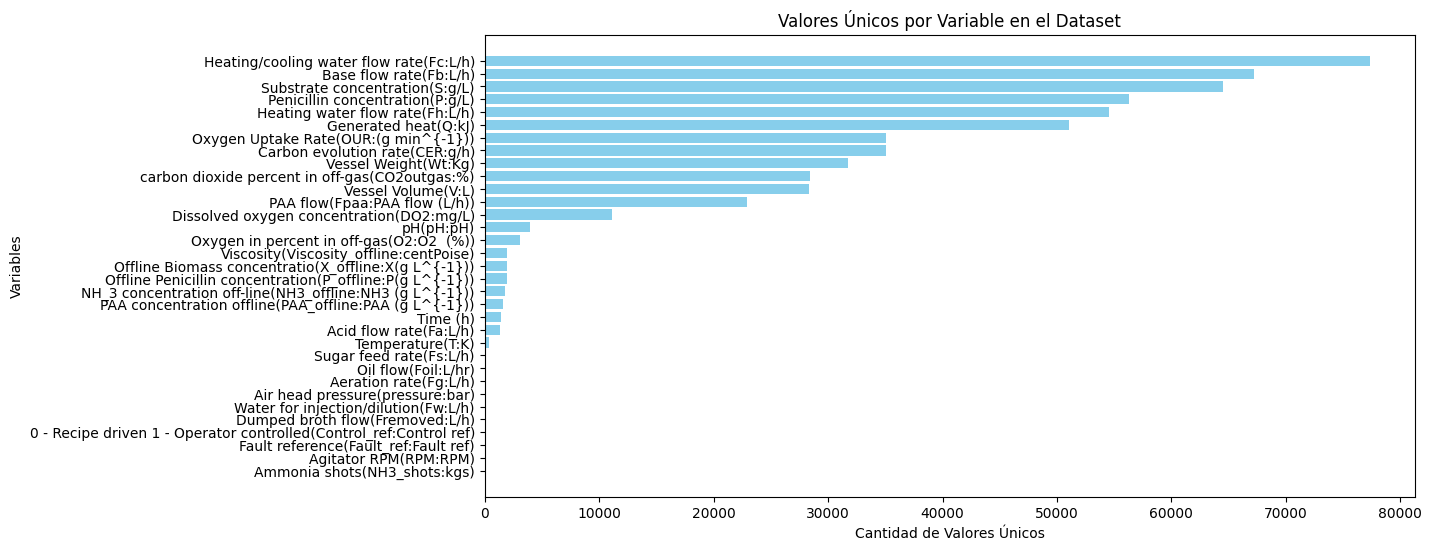

In [29]:
import matplotlib.pyplot as plt

# Configurar tamaño de la figura
plt.figure(figsize=(12, 6))

# Graficar valores únicos por columna
plt.barh(unique_values_df["Variable"], unique_values_df["Valores Únicos"], color="skyblue")
plt.xlabel("Cantidad de Valores Únicos")
plt.ylabel("Variables")
plt.title("Valores Únicos por Variable en el Dataset")
plt.gca().invert_yaxis()  # Invertir el eje para mejor visualización
plt.show()

In [30]:
#estadisticas descriptivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time (h),113935.0,114.750656,66.990504,2.000000e-01,57.000000,114.000000,171.000000,290.00000
Aeration rate(Fg:L/h),113935.0,65.246360,11.690215,2.000000e+01,60.000000,65.000000,75.000000,75.00000
Agitator RPM(RPM:RPM),113935.0,100.000000,0.000000,1.000000e+02,100.000000,100.000000,100.000000,100.00000
Sugar feed rate(Fs:L/h),113935.0,76.663764,25.680134,2.000000e+00,72.000000,80.000000,90.000000,150.00000
Acid flow rate(Fa:L/h),113935.0,0.073209,0.552788,0.000000e+00,0.000000,0.000000,0.000000,12.99600
Base flow rate(Fb:L/h),113935.0,61.334389,44.972713,0.000000e+00,35.766000,55.407000,76.271500,225.00000
Heating/cooling water flow rate(Fc:L/h),113935.0,74.346341,108.022600,1.000000e-04,11.157000,34.384000,94.904500,1500.00000
Heating water flow rate(Fh:L/h),113935.0,20.763025,50.230266,1.000000e-04,0.000100,0.159010,11.640500,1500.00000
Water for injection/dilution(Fw:L/h),113935.0,154.811954,155.601474,0.000000e+00,0.000000,100.000000,250.000000,500.00000
Air head pressure(pressure:bar),113935.0,0.945026,0.134269,6.000000e-01,0.900000,0.900000,1.100000,1.10000


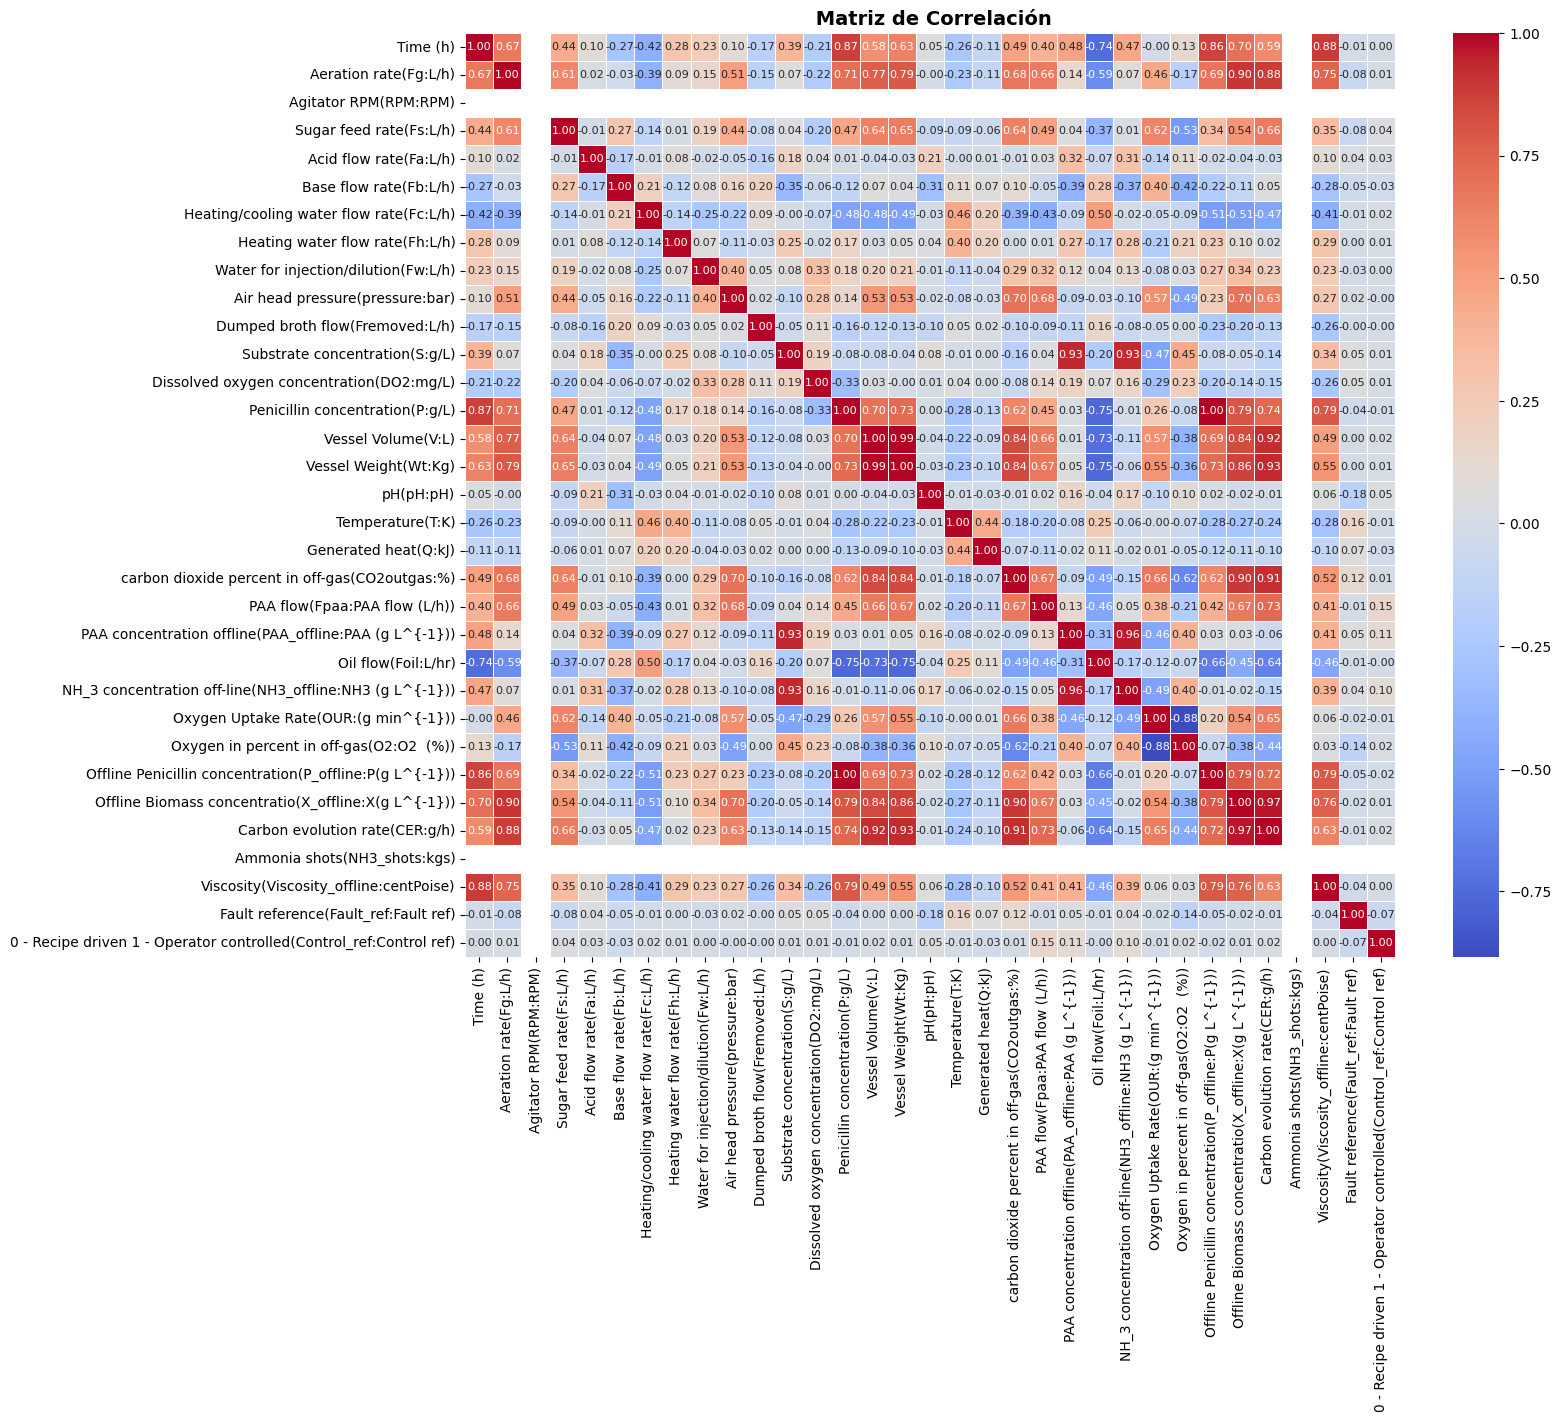

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# calcular la matriz de correlación
correlation_matrix = df.corr()

# Configurar una figura más grande y mejorar la visualización
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 8})

# Ajustar las etiquetas para mejor visualización
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Agregar título
plt.title(" Matriz de Correlación", fontsize=14, fontweight="bold")

# Mostrar el gráfico
plt.show()

### Analisis univariado de Fluido de PAA

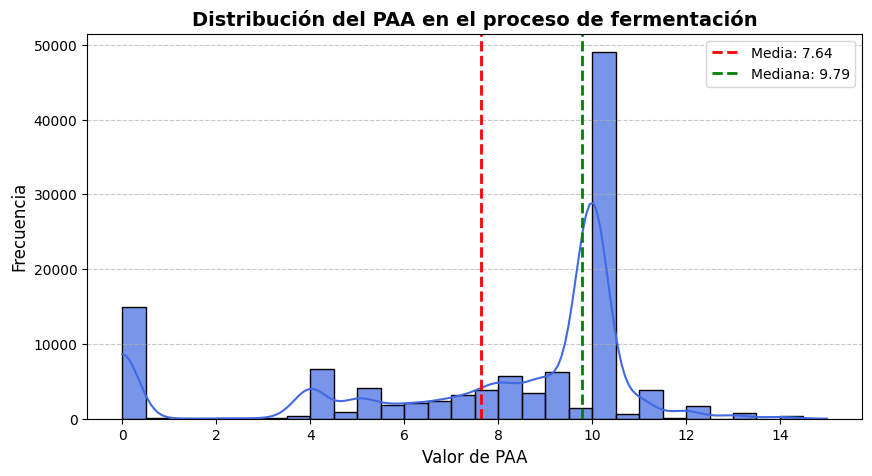

In [15]:
plt.figure(figsize=(10, 5))

# Histograma con mayor personalización
sns.histplot(dataset["PAA flow(Fpaa:PAA flow (L/h))"], bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.7)

# Agregar líneas de media y mediana
mean_value = dataset["PAA flow(Fpaa:PAA flow (L/h))"].mean()
median_value = dataset["PAA flow(Fpaa:PAA flow (L/h))"].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_value:.2f}')

# Mejorar etiquetas y título
plt.title("Distribución del PAA en el proceso de fermentación", fontsize=14, fontweight="bold")
plt.xlabel("Valor de PAA", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

In [21]:
skewness = dataset["PAA flow(Fpaa:PAA flow (L/h))"].skew()
print("Coeficiente de asimetría:", skewness)


Coeficiente de asimetría: -1.1605246649265606


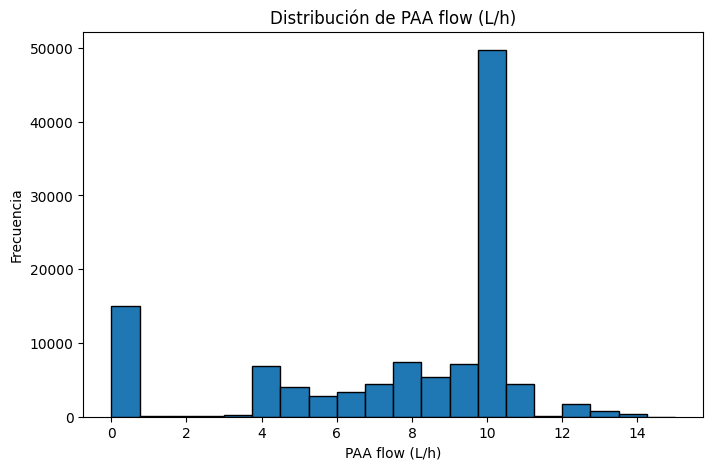

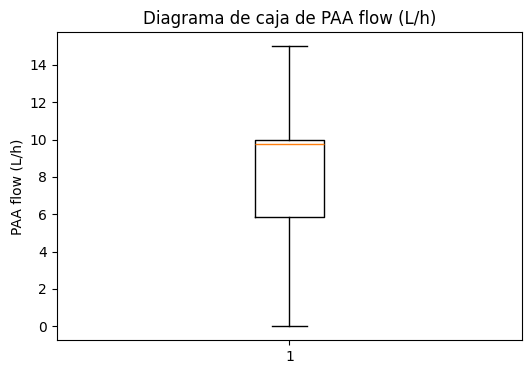

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(dataset["PAA flow(Fpaa:PAA flow (L/h))"], bins=20, edgecolor='black')
plt.xlabel("PAA flow (L/h)")
plt.ylabel("Frecuencia")
plt.title("Distribución de PAA flow (L/h)")
plt.show()

# Visualización: Diagrama de caja (boxplot)
plt.figure(figsize=(6, 4))
plt.boxplot(dataset["PAA flow(Fpaa:PAA flow (L/h))"].dropna())
plt.ylabel("PAA flow (L/h)")
plt.title("Diagrama de caja de PAA flow (L/h)")
plt.show()

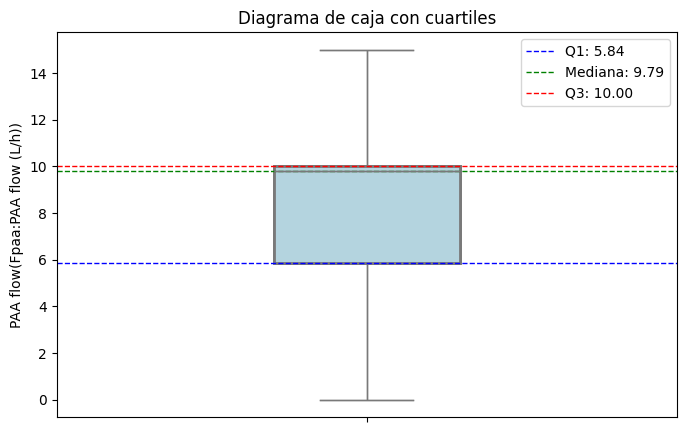

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(y=dataset["PAA flow(Fpaa:PAA flow (L/h))"], color="lightblue", width=0.3, boxprops=dict(linewidth=2.0))

# Añadir líneas de cuartiles
# Calcular cuartiles de la variable
q1 = dataset["PAA flow(Fpaa:PAA flow (L/h))"].quantile(0.25)
q2 = dataset["PAA flow(Fpaa:PAA flow (L/h))"].median()
q3 = dataset["PAA flow(Fpaa:PAA flow (L/h))"].quantile(0.75)

sns.boxplot(y=dataset["PAA flow(Fpaa:PAA flow (L/h))"], color="lightblue", width=0.3, boxprops=dict(linewidth=2.0))

# Añadir líneas de cuartiles
plt.axhline(y=q1, color='blue', linestyle='dashed', linewidth=1, label=f'Q1: {q1:.2f}')
plt.axhline(y=q2, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {q2:.2f}')
plt.axhline(y=q3, color='red', linestyle='dashed', linewidth=1, label=f'Q3: {q3:.2f}')
plt.legend()
plt.title("Diagrama de caja con cuartiles")
plt.show()


In [18]:
# Análisis descriptivo
descripcion = dataset["PAA flow(Fpaa:PAA flow (L/h))"].describe()
print("Resumen descriptivo:")
print(descripcion)

Resumen descriptivo:
count    113935.000000
mean          7.642712
std           3.560204
min           0.000000
25%           5.844400
50%           9.791200
75%          10.000000
max          15.000000
Name: PAA flow(Fpaa:PAA flow (L/h)), dtype: float64


In [ ]:

display(descripcion)


,Estadístico,Valor
0,count,113935.000000
1,mean,7.642712
2,std,3.560204
3,min,0.000000
4,25%,5.844400
5,50%,9.791200
6,75%,10.000000
7,max,15.000000


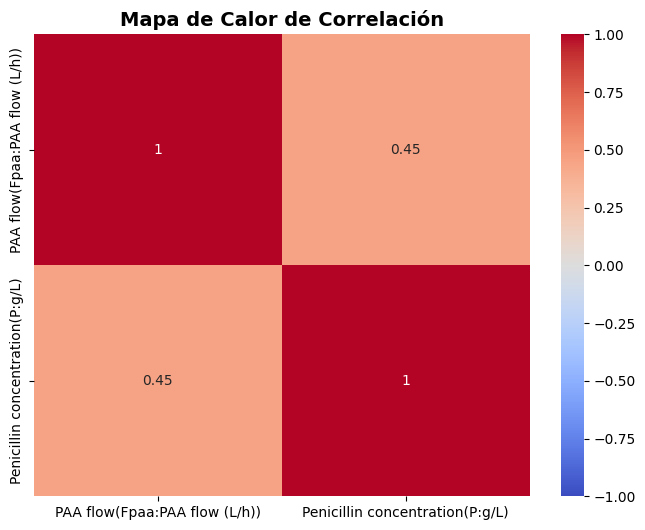

In [19]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(dataset[["PAA flow(Fpaa:PAA flow (L/h))", "Penicillin concentration(P:g/L)"]].corr(), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Mapa de Calor de Correlación", fontsize=14, fontweight="bold")
plt.show()

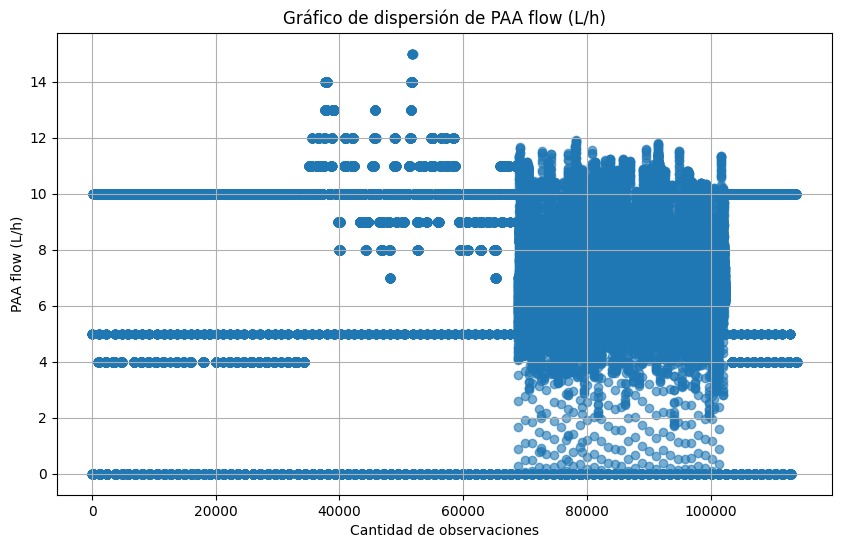

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(dataset.index, dataset["PAA flow(Fpaa:PAA flow (L/h))"], alpha=0.6)
plt.xlabel("Cantidad de observaciones")
plt.ylabel("PAA flow (L/h)")
plt.title("Gráfico de dispersión de PAA flow (L/h)")
plt.grid(True)
plt.show()


En el gráfico de dispersión (cada punto representa el valor de `PAA flow (L/h)` en el índice correspondiente) se observan **varios “bloques” o concentraciones de datos**:

1. Un grupo numeroso de puntos alrededor de **0 L/h**.  
2. Un grupo más disperso en la zona de **3–4 L/h**.  
3. Un bloque muy denso alrededor de **9–10 L/h** (donde parece haber la mayor cantidad de observaciones).  
4. Algunos valores puntuales que superan **12 L/h**.  

### Relación de PAA con la concentración de Penicilina

In [25]:
corr_value = dataset["PAA flow(Fpaa:PAA flow (L/h))"].corr(dataset["Penicillin concentration(P:g/L)"])
print("Correlación entre PAA flow y Penicilin concentration:", corr_value)

Correlación entre PAA flow y Penicilin concentration: 0.4516866948196667


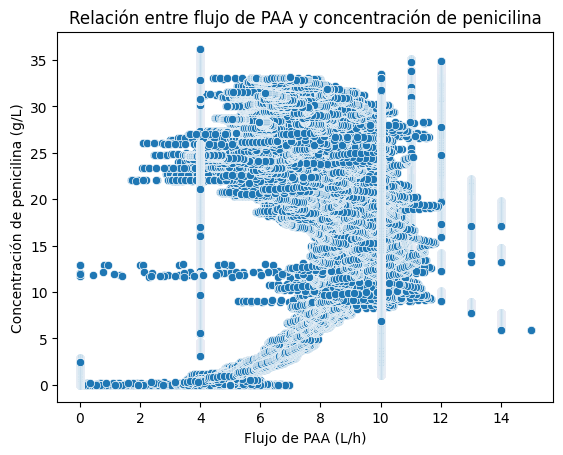

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=dataset,
    x="PAA flow(Fpaa:PAA flow (L/h))",
    y="Penicillin concentration(P:g/L)"
)
plt.title("Relación entre flujo de PAA y concentración de penicilina")
plt.xlabel("Flujo de PAA (L/h)")
plt.ylabel("Concentración de penicilina (g/L)")
plt.show()

### Analisis univariado de la Temperatura

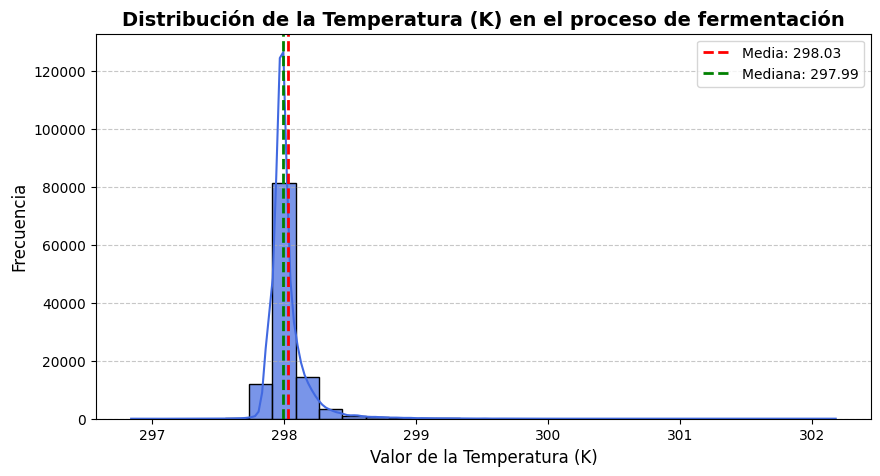

In [ ]:
plt.figure(figsize=(10, 5))

# Histograma con mayor personalización
sns.histplot(dataset["Temperature(T:K)"], bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.7)

# Agregar líneas de media y mediana
mean_value = dataset["Temperature(T:K)"].mean()
median_value = dataset["Temperature(T:K)"].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_value:.2f}')

# Mejorar etiquetas y título
plt.title("Distribución de la Temperatura (K) en el proceso de fermentación", fontsize=14, fontweight="bold")
plt.xlabel("Valor de la Temperatura (K)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

La distribución es asimétrica hacia la derecha, ya que hay una concentración muy alta de valores cerca de 298 K, pero algunos datos se extienden más allá de 300 K.

la temperatura se mantiene bastante estable en torno a 298 K, con algunos valores más altos ocasionales.


Media = 298.03 K (Línea roja discontinua)
Mediana = 297.99 K (Línea verde discontinua)

Interpretación:
- La media y la mediana están muy cercanas, lo que indica que la distribución es casi simétrica y no está fuertemente sesgada.
- Si hubiera una diferencia mayor entre ambas, indicaría una asimetría más pronunciada en los datos.

La mayor parte de los datos están agrupados entre 297.5 K y 298.5 K, lo que indica que la temperatura es bastante estable durante el proceso de fermentación.

Hay algunos valores más altos, que pueden ser outliers (valores atípicos), pero la mayoría de los datos se mantiene en un rango estrecho.

In [ ]:
dataset["Temperature(T:K)"].describe()

count    113935.000000
mean        298.026489
std           0.197513
min         296.840000
25%         297.950000
50%         297.990000
75%         298.040000
max         302.180000
Name: Temperature(T:K), dtype: float64

- 113,935 registros → Esto indica que la base de datos tiene una gran cantidad de observaciones de temperatura
- 298.03 K → Temperatura promedio en el proceso de fermentación.
    Indica que el proceso suele mantenerse en torno a este valor, con algunas fluctuaciones.

Mínimo: 296.84 K
Máximo: 302.18 K

Interpretación del mínimo y máximo:
- La mayor parte del tiempo, la temperatura está cerca de 298 K, pero hubo algunas lecturas tan bajas como 296.84 K y tan altas como 302.18 K.


**Cuartiles (`25%`, `50%` - Mediana, `75%`)**
| Percentil  | Temperatura (K) | Interpretación |
|------------|----------------|---------------|
| **Q1 (25%)** | 297.95 | El 25% de las observaciones tiene una temperatura **inferior a este valor**. |
| **Q2 (50%) - Mediana** | 297.99 | **La mitad de los valores está por debajo de este punto**. |
| **Q3 (75%)** | 298.04 | El 75% de las observaciones tiene una temperatura **menor a este valor**. |

**Interpretación:**  
- **La mediana y la media son casi iguales** (**297.99 ≈ 298.03**), lo que indica que la distribución es **simétrica y estable**.  
- **El rango entre Q1 y Q3 es muy pequeño**, lo que confirma **baja variabilidad** en la temperatura.


### Analisis univariado de la Concentración de Penicilina

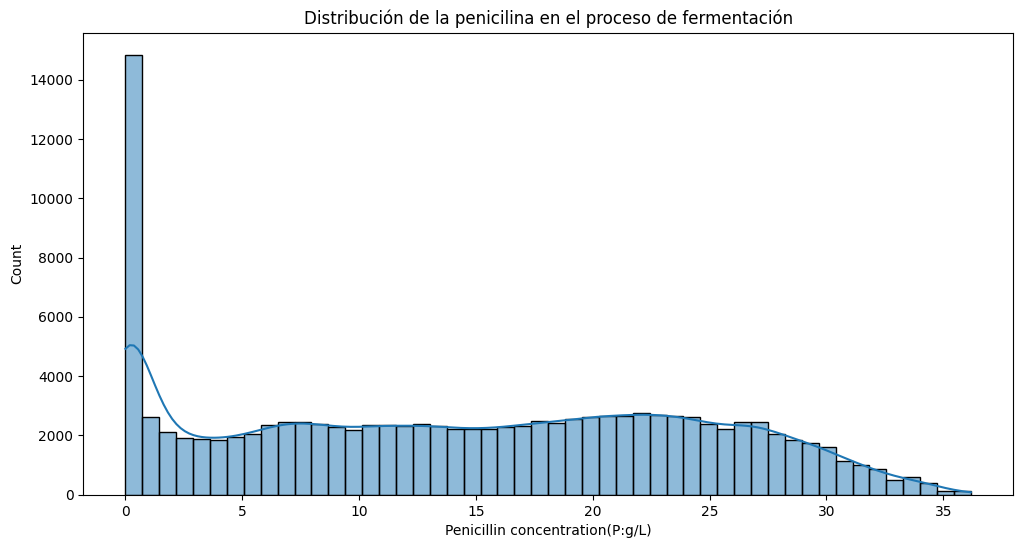

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset["Penicillin concentration(P:g/L)"], bins=50, kde=True)
plt.title("Distribución de la penicilina en el proceso de fermentación")
plt.show()


In [ ]:
dataset["Penicillin concentration(P:g/L)"].describe()

count    1.139350e+05
mean     1.433395e+01
std      9.932453e+00
min      3.694700e-26
25%      5.531250e+00
50%      1.438000e+01
75%      2.268750e+01
max      3.618300e+01
Name: Penicillin concentration(P:g/L), dtype: float64

In [ ]:
print(dataset.columns)


Index(['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)',
       'Air head pressure(pressure:bar)',
       ...
       '210', '209', '208', '207', '206', '205', '204', '203', '202', '201'],
      dtype='object', length=2239)
